In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from cynetdiff.utils import networkx_to_ic_model
import numpy as np

In [10]:
def create_plot_for_nodes_infected_perc(graph1: nx.Graph,  graph2: nx.Graph = None, graph3: nx.Graph = None, graph4: nx.Graph = None, plot_iqr: bool = False):
    """
    Create a plot of the percentage of nodes infected for a CyNetDiff model across multiple trials for up to four graphs.
    If plot_iqr is True, plots the interquartile range and horizontal lines.
    """
    graphs = [g for g in [graph1, graph2, graph3, graph4] if g is not None]
    colors = ['#3f83a6', '#d95f02', '#1b9e77', '#7570b3']  # Distinct colors for each graph
    light_colors = ['#7daec7', '#fdae6b', '#66c2a5', '#bcbddc']  # Lighter colors for IQR fill
    
    for idx, graph in enumerate(graphs):
        model = networkx_to_ic_model(graph)
        
        seeds = set(random.sample(list(graph.nodes()), 100))
        model.set_seeds(seeds)
        num_trials = 100

        all_trials_infected_nodes = []
        max_length = 0

        for _ in range(num_trials):
            model.reset_model()

            infected_nodes_over_time = []
            previous_activated = -1
            current_activated = 0

            while previous_activated != current_activated:
                previous_activated = current_activated
                model.advance_model()
                current_activated = model.get_num_activated_nodes()
                percentage_infected = (current_activated / graph.number_of_nodes()) * 100
                infected_nodes_over_time.append(percentage_infected)

            max_length = max(max_length, len(infected_nodes_over_time))
            all_trials_infected_nodes.append(infected_nodes_over_time)

        padded_trials = [
            trial + [trial[-1]] * (max_length - len(trial)) for trial in all_trials_infected_nodes
        ]

        median_infected = np.median(padded_trials, axis=0)

        if plot_iqr:
            iqr_values = [np.percentile([trial[i] if i < len(trial) else trial[-1] for trial in padded_trials], [25, 75]) for i in range(max_length)]
            lower_quartile, upper_quartile = zip(*iqr_values)

            for y in median_infected:
                plt.axhline(y=y, color=colors[idx], linestyle="--", alpha=0.2)

            plt.fill_between(range(len(lower_quartile)), lower_quartile, upper_quartile, color=light_colors[idx], alpha=0.3)

        plt.plot(median_infected, label=f"Graph {idx+1} Median Infected", color=colors[idx])

    plt.xlabel("Iteration")
    plt.ylabel("Percentage of Infected Nodes")
    plt.title("Diffusion Process Over Time")
    plt.legend()
    plt.show()

In [6]:
def create_plot_for_delta_nodes_infected(graph1: nx.Graph, graph2: nx.Graph = None, graph3: nx.Graph = None, graph4: nx.Graph = None, plot_iqr: bool = False):
    """
    Create a plot of the delta of nodes infected for a CyNetDiff model across multiple trials for up to four graphs.
    If plot_iqr is True, plots the interquartile range and horizontal lines.
    """
    graphs = [g for g in [graph1, graph2, graph3, graph4] if g is not None]
    for graph in graphs:
        model = networkx_to_ic_model(graph)
        # Assuming set_seeds is defined elsewhere or seeds need to be defined/adjusted per graph
        seeds = set(random.sample(list(graph.nodes()), 100))
        model.set_seeds(seeds)
        num_trials = 1

        all_trials_delta_nodes = []
        max_length = 0

        for _ in range(num_trials):
            model.reset_model()

            delta_nodes_over_time = []
            previous_activated = -1
            current_activated = 0

            while previous_activated != current_activated:
                previous_activated = current_activated
                model.advance_model()
                current_activated = model.get_num_activated_nodes()
                delta_nodes_over_time.append(current_activated - previous_activated)

            max_length = max(max_length, len(delta_nodes_over_time))
            all_trials_delta_nodes.append(delta_nodes_over_time)

        padded_trials = [
            trial + [0] * (max_length - len(trial)) for trial in all_trials_delta_nodes
        ]

        median_delta = np.median(padded_trials, axis=0)

        if plot_iqr:
            # Calculate and plot the IQR only if plot_iqr is True
            iqr_values = [np.percentile([trial[i] if i < len(trial) else 0 for trial in padded_trials], [25, 75]) for i in range(max_length)]
            lower_quartile, upper_quartile = zip(*iqr_values)

            for y in median_delta:
                plt.axhline(y=y, color="gray", linestyle="--", alpha=0.2)

            plt.fill_between(range(len(lower_quartile)), lower_quartile, upper_quartile, color="#7daec7", alpha=0.3)

        plt.plot(median_delta, label="Median Delta Nodes", color="#3f83a6")

    plt.xlabel("Iteration")
    plt.ylabel("Delta Nodes Infected")
    plt.title("Diffusion Process Over Time")
    plt.legend()
    plt.show()

In [9]:
O = nx.fast_gnp_random_graph(15000, 2)
G = nx.watts_strogatz_graph(15000, 100, 0.01)
B = nx.erdos_renyi_graph(100, 0.1)
nx.set_edge_attributes(G, 0.01, "activation_prob")
nx.set_edge_attributes(O, 0.01, "activation_prob")
nx.set_edge_attributes(B, 0.01, "activation_prob")

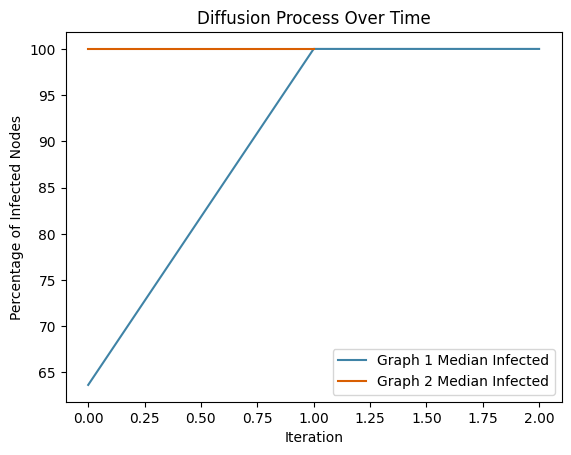

In [11]:
create_plot_for_nodes_infected_perc(O,B,None,None , False)

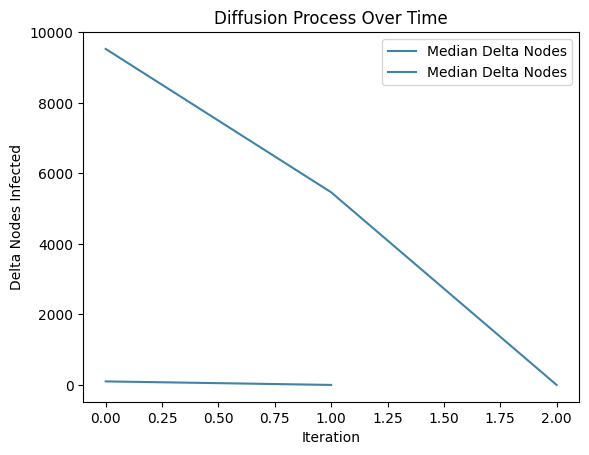

In [12]:
create_plot_for_delta_nodes_infected(O,B,None, None ,False)